# Análise da base de dados  - FIFA 2019

*   Bernardo Ferreira Marques - bernardo.marques93@gmail.com



---




A base de dados escolhida é composta pelos atributos dos jogadores de futebol relacionados no jogo FIFA 2019. É composta por uma única tabela no formato CSV, totalizando 89 campos como por exemplo, nome, idade, nacionalidade, salário, valor de mercado, atributos do seu posicionamento em campo, etc. 



---


# Bibliotecas utilizadas

# Numpy
NumPy - biblioteca Python usada para realizar cálculos em arrays Multidimensionais.

# Pandas
Pandas - biblioteca Python que fornece estruturas e ferramentas de análise de dados cobrindo manipulação, leitura e visualização de dados.

# Matplotlib.pyplot
*Matplotlib* - biblioteca Python para a geração de gráficos 2D a partir de arrays.

O conjunto de funções disponível em *Matplotlib.Pyplot* permitem criação de figuras, área para exibição de gráfico.

# RE - Regular Expression
*Re* - biblioteca Python que permite tratamento de expressões regulares.

# Seaborn
*Seaborn* - biblioteca Python que utiliza o Matplotlib como base e fornece funções para criação de gráficos que seriam complexos apenas com o Matplotlib.

#OS
*Os* - biblioteca Python que fornece uma forma de acessar o sistema operacional.

In [ ]:
#Importação das Bibliotecas
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import re
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/content/sample_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/sample_data/README.md
/content/sample_data/anscombe.json
/content/sample_data/data.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/mnist_test.csv


In [ ]:
data = pd.read_csv('/content/sample_data/data.csv') #Carregar a base de dados
data.head() #Exibir os primeiros registros da tabela

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
data.drop(columns='Unnamed: 0' ,inplace=True) #Remover a coluna "Unnamed: 0"
data.head() #Verificar se a alteração foi realizada

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
data.columns #Exibir todas as colunas presentes na base de dados

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [ ]:
#Criar um novo DataFrame com 4 colunas
df = data[['Name','Nationality', 'Position','Wage']]
df.head()

,Name,Nationality,Position,Wage
0,L. Messi,Argentina,RF,€565K
1,Cristiano Ronaldo,Portugal,ST,€405K
2,Neymar Jr,Brazil,LW,€290K
3,De Gea,Spain,GK,€260K
4,K. De Bruyne,Belgium,RCM,€355K


In [ ]:
df.shape #Exibir o formato (nº de linhas e colunas) do novo DataFrame

(18207, 4)

In [ ]:
#Remover os valores duplicados e NaNs
df.drop_duplicates(inplace = True)
df.dropna(inplace = True)

In [ ]:
for i in range(len(df)):
    df.iloc[i]['Wage'] = df.iloc[i]['Wage'][1:-1] #Remover o símbolo "€" e o "K" presente nos valores da coluna de Salário, pegando apenas os números, que vão do 2º ao penúltimo elemento
df['Wage'] = df['Wage'].replace('',0) #Substituindo os espaços
df.head() #Exibir resultados para verificar se alterações foram realizadas 

,Name,Nationality,Position,Wage
0,L. Messi,Argentina,RF,565
1,Cristiano Ronaldo,Portugal,ST,405
2,Neymar Jr,Brazil,LW,290
3,De Gea,Spain,GK,260
4,K. De Bruyne,Belgium,RCM,355


In [ ]:
#Reiniciar os índices
df.reset_index(inplace=True)
df.head() 

,index,Name,Nationality,Position,Wage
0,0,L. Messi,Argentina,RF,565
1,1,Cristiano Ronaldo,Portugal,ST,405
2,2,Neymar Jr,Brazil,LW,290
3,3,De Gea,Spain,GK,260
4,4,K. De Bruyne,Belgium,RCM,355


In [ ]:
#Descartar a coluna com os índices antigos
df.drop(columns='index' , inplace = True)
df.head()

,Name,Nationality,Position,Wage
0,L. Messi,Argentina,RF,565
1,Cristiano Ronaldo,Portugal,ST,405
2,Neymar Jr,Brazil,LW,290
3,De Gea,Spain,GK,260
4,K. De Bruyne,Belgium,RCM,355


In [ ]:
#Exibir a lista dos jogadores que ganham acima de €100K e o número.
count = 0
i = 0
for item in df.values :
    if 100 < int(item[-1]):
        count += 1
        print(item[0])
    else : 
        df.drop(index= i,inplace = True)
    i += 1
print('O número de jogadores que ganham acima de €100K é',count)

L. Messi
Cristiano Ronaldo
Neymar Jr
De Gea
K. De Bruyne
E. Hazard
L. Modrić
L. Suárez
Sergio Ramos
R. Lewandowski
T. Kroos
D. Godín
David Silva
N. Kanté
P. Dybala
H. Kane
A. Griezmann
M. ter Stegen
T. Courtois
Sergio Busquets
E. Cavani
M. Neuer
S. Agüero
G. Chiellini
M. Salah
Casemiro
J. Rodríguez
L. Insigne
Isco
C. Eriksen
Coutinho
P. Aubameyang
M. Hummels
Marcelo
G. Bale
H. Lloris
G. Higuaín
Thiago Silva
S. Handanovič
S. Umtiti
M. Icardi
K. Koulibaly
P. Pogba
K. Navas
R. Lukaku
C. Immobile
Jordi Alba
D. Mertens
J. Vertonghen
M. Hamšík
I. Rakitić
Piqué
L. Sané
Bernardo Silva
Ederson
S. Mané
V. van Dijk
R. Sterling
Roberto Firmino
R. Varane
M. Verratti
Alex Sandro
Douglas Costa
T. Müller
Thiago
Azpilicueta
L. Bonucci
T. Alderweireld
M. Pjanić
M. Benatia
M. Özil
Fernandinho
Marco Asensio
Alisson
R. Mahrez
D. Alaba
A. Lacazette
N. Otamendi
Paulinho
W. Szczęsny
A. Sánchez
J. Boateng
A. Vidal
I. Perišić
E. Džeko
S. Khedira
R. Nainggolan
B. Matuidi
K. Benzema
V. Kompany
D. Sánchez
A. Lapor

In [ ]:
df.sort_values('Wage',ascending=False) #Exibir a lista dos maiores salários

,Name,Nationality,Position,Wage
0,L. Messi,Argentina,RF,565
7,L. Suárez,Uruguay,RS,455
6,L. Modrić,Croatia,RCM,420
1,Cristiano Ronaldo,Portugal,ST,405
8,Sergio Ramos,Spain,RCB,380
...,...,...,...,...
101,R. Nainggolan,Belgium,CAM,105
395,E. Lamela,Argentina,RM,105
352,B. Mendy,France,LB,105
327,E. Bailly,Ivory Coast,CB,105


In [ ]:
df.dtypes #Identificar os tipos de variáveis

Name           object
Nationality    object
Position       object
Wage           object
dtype: object

A coluna de salários permanece sendo reconhecida como objeto. Dessa forma, será necessário alterar o seu formato para valores inteiros antes de qualquer análise.

In [ ]:
df['Wage'] = df['Wage'].astype(str).astype(int)
df.dtypes #Verificar a alteração

Name           object
Nationality    object
Position       object
Wage            int64
dtype: object

In [ ]:
df.groupby('Position').mean()['Wage'] #Exibir a média salarial por posição

Position
CAM    153.846154
CB     139.583333
CDM    194.285714
CM     129.000000
GK     153.571429
LAM    315.000000
LB     158.750000
LCB    151.250000
LCM    178.125000
LDM    176.250000
LF     272.500000
LM     160.714286
LS     188.333333
LW     225.714286
RAM    150.000000
RB     149.285714
RCB    165.384615
RCM    264.000000
RDM    167.500000
RF     350.000000
RM     132.272727
RS     285.000000
RW     170.416667
ST     178.095238
Name: Wage, dtype: float64

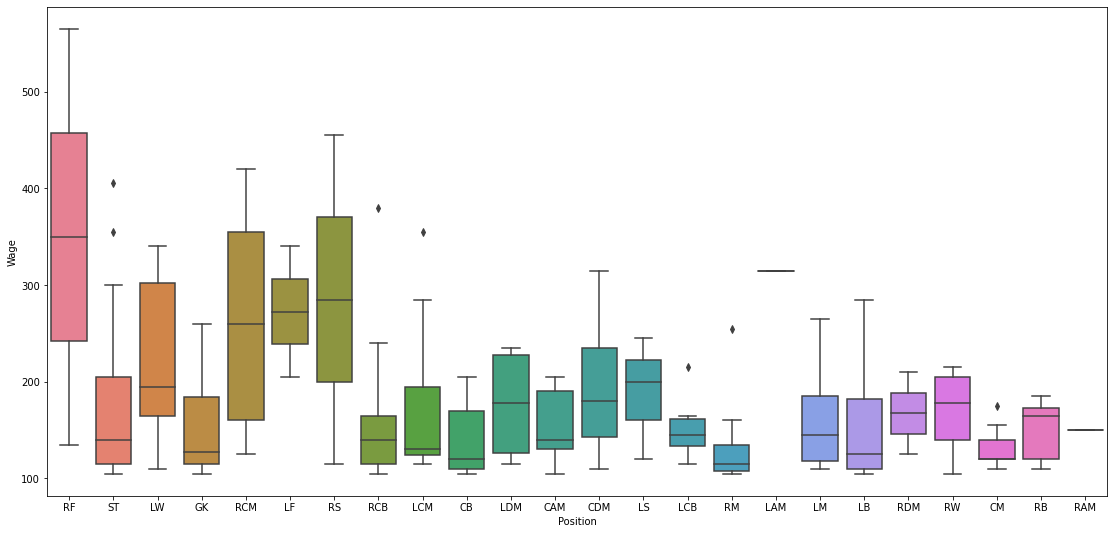

In [ ]:
%matplotlib inline
plt.figure(figsize=(19,9))
sns.boxplot(x='Position', y='Wage', data=df, palette="husl") #Gráfico Boxplot de salário por posição

In [ ]:
df.nunique() #Número de elementos únicos

Name           185
Nationality     39
Position        24
Wage            43
dtype: int64

In [ ]:
df['Position'].unique() #Lista de todas as posições dos jogadores

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM'], dtype=object)

O número de posições é relativamente alto, o que torna a análise do gráfico mais complexa. Além disso, muitas das posições diferem umas das outras apenas pelo lado (direito, esquerdo, central) em que o jogador atua. Sendo assim, foi proposto um reagrupamento para reduzir o número de posições da base de dados.

In [ ]:
df['Position'] = df['Position'].replace(['RF','ST','LF','RS','LS'], 'Atacante') #Reagrupamento dos atacantes
df['Position'] = df['Position'].replace('GK','Goleiro') #Substituição do "GK" por "Goleiro"
df['Position'] = df['Position'].replace(['LW','RW'], 'Lateral') #Reagrupamento dos laterais
df['Position'] = df['Position'].replace(['RCM','LCM','CAM','RM','LAM','LM','CM','RAM'], 'Meio-campo') #Reagrupamento dos jogadores de meio-campo
df['Position'] = df['Position'].replace(['LDM','CDM','RDM'], 'Volante') #Reagrupamento dos volantes
df['Position'] = df['Position'].replace(['RCB','CB','LCB','LB','RB'], 'Zagueiro') #Reagrupamento dos zagueiros
df.sample(20) #Exibir uma amostra para verificar se os nomes na coluna "Position" foram alterados

,Name,Nationality,Position,Wage
31,C. Eriksen,Denmark,Meio-campo,205
154,A. Robben,Netherlands,Meio-campo,110
72,M. Pjanić,Bosnia Herzegovina,Volante,180
98,E. Džeko,Bosnia Herzegovina,Atacante,115
296,J. Henderson,England,Meio-campo,125
294,M. Arnautović,Austria,Atacante,120
71,T. Alderweireld,Belgium,Zagueiro,150
281,S. Mustafi,Germany,Zagueiro,115
0,L. Messi,Argentina,Atacante,565
613,Denis Suárez,Spain,Meio-campo,120


In [ ]:
df['Position'].unique() #Verificar todas as posições possíveis para assegurar que não restam as posições antigas

array(['Atacante', 'Lateral', 'Goleiro', 'Meio-campo', 'Zagueiro',
       'Volante'], dtype=object)

In [ ]:
df.groupby('Position').mean()['Wage'] #Exibir novamente a média salarial por posição

Position
Atacante      204.000000
Goleiro       153.571429
Lateral       190.789474
Meio-campo    159.426230
Volante       184.615385
Zagueiro      153.125000
Name: Wage, dtype: float64

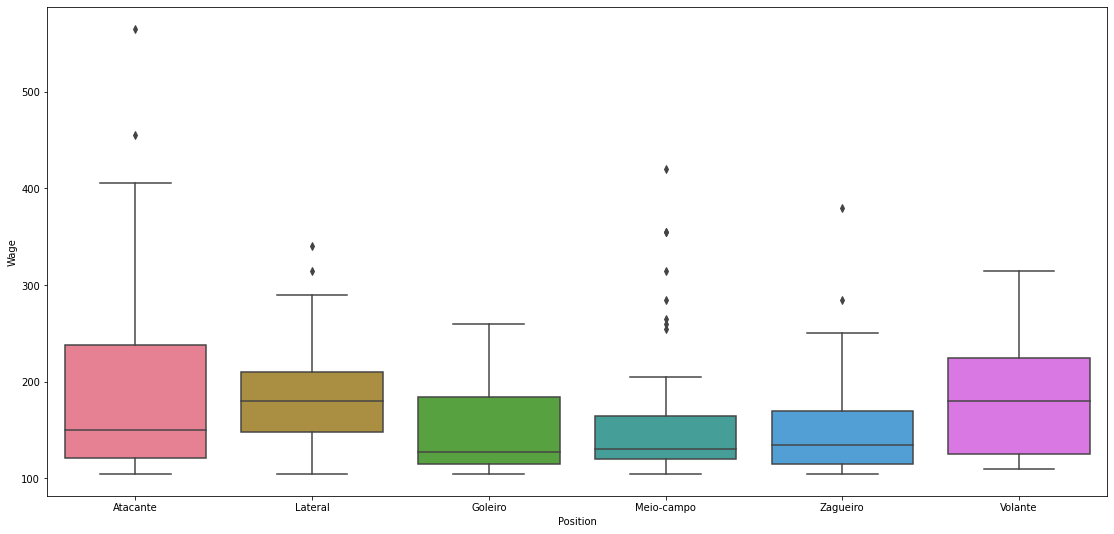

In [ ]:
plt.figure(figsize=(19,9))
sns.boxplot(x='Position', y='Wage', data=df, palette="husl") #Exibir novamente o Gráfico Boxplot por posição

Nessa nova seção, será avaliada uma possível correlação entre o salário e a idade dos jogadores.

In [ ]:
df2 = data[['Name', 'Age','Wage']] #Criação de um novo Dataframe
df2.head()

,Name,Age,Wage
0,L. Messi,31,€565K
1,Cristiano Ronaldo,33,€405K
2,Neymar Jr,26,€290K
3,De Gea,27,€260K
4,K. De Bruyne,27,€355K


In [ ]:
#Eliminando valores duplicados e NaNs
df2.drop_duplicates(inplace = True)
df2.dropna(inplace = True)

In [ ]:
#Tratamento dos dados referentes aos salários para que sejam vistos como números
for i in range(len(df2)):
    df2.iloc[i,df2.columns.get_loc('Wage')] = df2.iloc[i,df2.columns.get_loc('Wage')][1:-1]
df2['Wage'] = df2['Wage'].replace('',0)
df2.head()

,Name,Age,Wage
0,L. Messi,31,565
1,Cristiano Ronaldo,33,405
2,Neymar Jr,26,290
3,De Gea,27,260
4,K. De Bruyne,27,355


In [ ]:
#Reiniciar os índices
df2.reset_index(inplace=True)
df2.head()

,index,Name,Age,Wage
0,0,L. Messi,31,565
1,1,Cristiano Ronaldo,33,405
2,2,Neymar Jr,26,290
3,3,De Gea,27,260
4,4,K. De Bruyne,27,355


In [ ]:
#Excluir a coluna com os índices antigos
df2.drop(columns='index' , inplace = True)
df2.head()

,Name,Age,Wage
0,L. Messi,31,565
1,Cristiano Ronaldo,33,405
2,Neymar Jr,26,290
3,De Gea,27,260
4,K. De Bruyne,27,355


In [ ]:
#Verificar os tipos de variáveis reconhecidos por coluna 
df2.dtypes

Name    object
Age      int64
Wage    object
dtype: object

In [ ]:
#Alterar o salário para número inteiro
df2['Wage'] = df2['Wage'].astype(str).astype(int)
df2.dtypes

Name    object
Age      int64
Wage     int64
dtype: object

<Figure size 864x504 with 0 Axes>

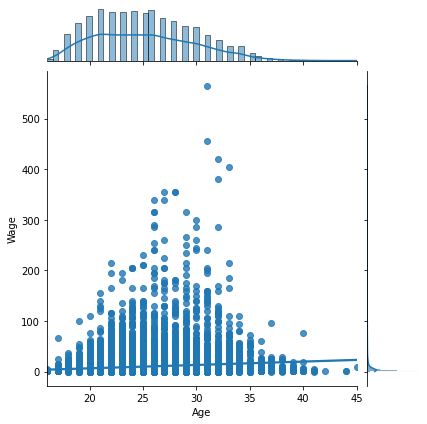

In [ ]:
#Plotar o gráfico de correlação entre salário e idade
plt.figure(figsize=(12,7))
sns.jointplot(x='Age',y='Wage',data=df2,kind='reg')

Clusterização de jogadores com base em Desempenho e Valor de mercado

In [ ]:
#Criação de um novo DataFrame
df3 = data[['Name','Wage','Overall','Value']]
df3.head()

,Name,Wage,Overall,Value
0,L. Messi,€565K,94,€110.5M
1,Cristiano Ronaldo,€405K,94,€77M
2,Neymar Jr,€290K,92,€118.5M
3,De Gea,€260K,91,€72M
4,K. De Bruyne,€355K,91,€102M


In [ ]:
#Remover valores duplicados e NaNs
df3.drop_duplicates(inplace = True)
df3.dropna(inplace = True)

In [ ]:
#Tratamento dos valores salariais
for i in range(len(df3)):
    df3.iloc[i,df3.columns.get_loc('Wage')] = df3.iloc[i,df3.columns.get_loc('Wage')][1:-1]
df3['Wage'] = df3['Wage'].replace('',0)
df3.head()

,Name,Wage,Overall,Value
0,L. Messi,565,94,€110.5M
1,Cristiano Ronaldo,405,94,€77M
2,Neymar Jr,290,92,€118.5M
3,De Gea,260,91,€72M
4,K. De Bruyne,355,91,€102M


In [ ]:
#Tratamento dos valores da coluna "Value"
for i in range(len(df3)):
    df3.iloc[i,df3.columns.get_loc('Value')] = df3.iloc[i,df3.columns.get_loc('Value')][1:-1]
df3['Value'] = df3['Value'].replace('',0)
df3.head()

,Name,Wage,Overall,Value
0,L. Messi,565,94,110.5
1,Cristiano Ronaldo,405,94,77
2,Neymar Jr,290,92,118.5
3,De Gea,260,91,72
4,K. De Bruyne,355,91,102


In [ ]:
#Reiniciar os índices
df3.reset_index(inplace=True)
df3.head()

,index,Name,Wage,Overall,Value
0,0,L. Messi,565,94,110.5
1,1,Cristiano Ronaldo,405,94,77
2,2,Neymar Jr,290,92,118.5
3,3,De Gea,260,91,72
4,4,K. De Bruyne,355,91,102


In [ ]:
#Descartar a coluna com os índices antigos
df3.drop(columns='index' , inplace = True)
df3.head()

,Name,Wage,Overall,Value
0,L. Messi,565,94,110.5
1,Cristiano Ronaldo,405,94,77
2,Neymar Jr,290,92,118.5
3,De Gea,260,91,72
4,K. De Bruyne,355,91,102


In [ ]:
#Verificar os tipos de variáveis reconhecidos
df3.dtypes

Name       object
Wage       object
Overall     int64
Value      object
dtype: object

In [ ]:
#Alterar a variável Salário para o tipo "int" e o Valor para o tipo "float" 
df3['Wage'] = df3['Wage'].astype(str).astype(int)
df3['Value'] = df3['Value'].astype(str).astype(float)
df3.dtypes

Name        object
Wage         int64
Overall      int64
Value      float64
dtype: object

In [ ]:
from sklearn.preprocessing import StandardScaler   # Importar módulo do Scikit-Lear para padronização de dados.

scaler = StandardScaler()  # Declarar o método.

colunas_para_normalizar = ["Overall","Value"]  # Escolher as colunas para padronizar.

scaler.fit(df3[colunas_para_normalizar])  # Treinar o modelo de padronização com as colunas desejadas.

colunas_normalizadas = scaler.transform(df3[colunas_para_normalizar])    # Executar o modelo de padronização nas colunas selecionadas.

import copy    #  Importar o copy
BaseDeDados_Original = copy.deepcopy(df3)  # Guardar a base de dados original para usar na avaliação final do resultado.

for i in range(len(colunas_para_normalizar)):     # Passar as colunas padronizadas de volta para o DataFrame principal.
    df3[colunas_para_normalizar[i]] = colunas_normalizadas[:,i]    

In [ ]:
df3.head() #Verificar se a normalização foi realizada

,Name,Wage,Overall,Value
0,L. Messi,565,4.018198,-0.533607
1,Cristiano Ronaldo,405,4.018198,-0.649310
2,Neymar Jr,290,3.728711,-0.505976
3,De Gea,260,3.583968,-0.666579
4,K. De Bruyne,355,3.583968,-0.562965


In [ ]:
df3.isnull().sum()

Name       0
Wage       0
Overall    0
Value      0
dtype: int64

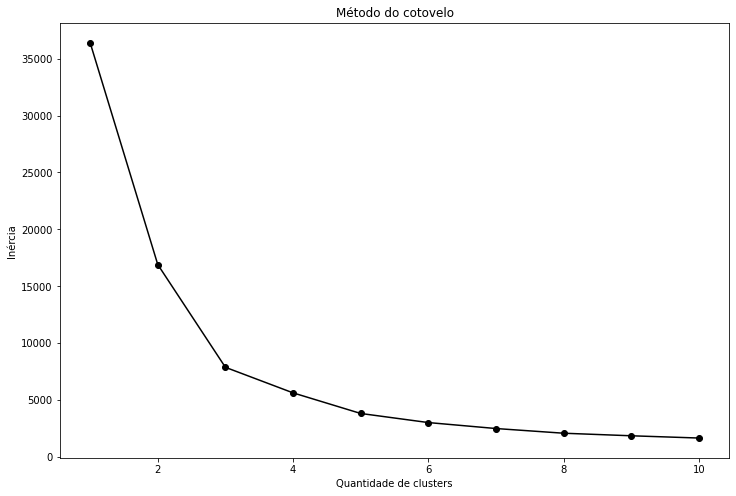

In [ ]:
# Escolher as colunas da base de dados que serão usadas no modelo.
Dados_Modelo = df3[["Overall","Value"]]

# Importar o método KMeans do Scikit-Learn.
from sklearn.cluster import KMeans    

# Declarar uma lista vazia para começar a armazer as somas dos erros médios de cada quantidade de clusters.
Inercia = []    

# Executar o K-Means para 10 quantidades, de 1 a 11.
for i in range(1,11): 

    kmeans = KMeans(n_clusters= i,         # Declarar o método do K-means com a quatidade de clusters referentes ao loop da vez.
                    init='k-means++',      # k-means++ é um método otimizado de iniciar os centroides para evitar mínimos e máximos locais.
                    random_state=101)      # Padronizar uma semente aleatória para cada loop apresentar resultados compatíveis.

    kmeans.fit(Dados_Modelo)               # Treinar o modelo.

    Inercia.append(kmeans.inertia_)        # Armazenar a Inercia (somatório dos erros médios quadráticos) para cada loop.

# Plotar gráfico do da quantidade de clusters pela Inércia.
plt.figure(figsize=(12,8))
plt.plot(range(1,11), Inercia, "ko-")
plt.title('Método do cotovelo')
plt.xlabel('Quantidade de clusters')
plt.ylabel('Inércia')
plt.show()

In [ ]:
# Declarar o modelo com 4 clusters, k-means++ e a mesma semente aleatória da método do cotovelo.
ModeloKMeansFinal = KMeans(n_clusters= 4, init='k-means++', random_state=101)

# Treinar o modelo e salvar os resultados dos grupos.
Resultado = ModeloKMeansFinal.fit_predict(Dados_Modelo)

# Adicionar resultados ao DataFrame nos dados originais.
BaseDeDados_Original["Cluster"] = ModeloKMeansFinal.labels_

#Mostrar DataFrame
BaseDeDados_Original

,Name,Wage,Overall,Value,Cluster
0,L. Messi,565,94,110.5,0
1,Cristiano Ronaldo,405,94,77.0,0
2,Neymar Jr,290,92,118.5,0
3,De Gea,260,91,72.0,0
4,K. De Bruyne,355,91,102.0,0
...,...,...,...,...,...
18200,J. Lundstram,1,47,60.0,2
18201,N. Christoffersson,1,47,60.0,2
18202,B. Worman,1,47,60.0,2
18203,D. Walker-Rice,1,47,60.0,2


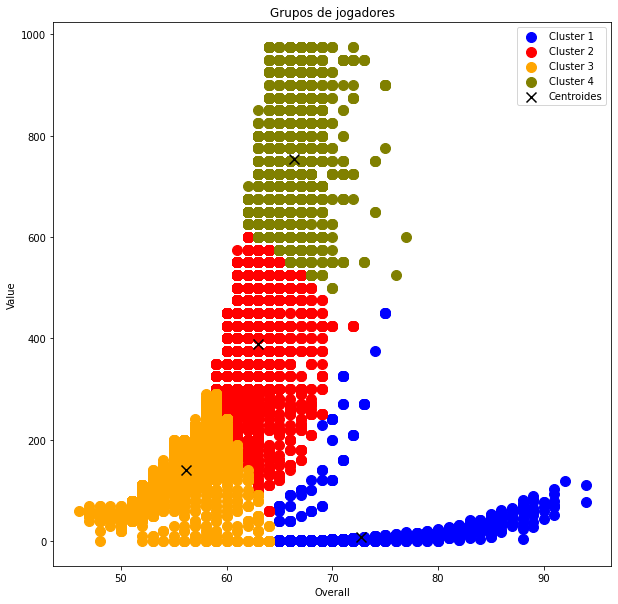

In [ ]:
# Plotar gráfico com os resultados

plt.figure(figsize=(10,10))
plt.scatter(BaseDeDados_Original["Overall"][BaseDeDados_Original["Cluster"]==0], BaseDeDados_Original["Value"][BaseDeDados_Original["Cluster"]==0], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(BaseDeDados_Original["Overall"][BaseDeDados_Original["Cluster"]==1], BaseDeDados_Original["Value"][BaseDeDados_Original["Cluster"]==1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(BaseDeDados_Original["Overall"][BaseDeDados_Original["Cluster"]==2], BaseDeDados_Original["Value"][BaseDeDados_Original["Cluster"]==2], s = 100, c = 'orange', label = 'Cluster 3')
plt.scatter(BaseDeDados_Original["Overall"][BaseDeDados_Original["Cluster"]==3], BaseDeDados_Original["Value"][BaseDeDados_Original["Cluster"]==3], s = 100, c = 'olive', label = 'Cluster 4')
plt.scatter(scaler.inverse_transform(ModeloKMeansFinal.cluster_centers_)[:, 0], scaler.inverse_transform(ModeloKMeansFinal.cluster_centers_)[:, 1], s = 100, c = 'black', label = 'Centroides', marker = "x")
plt.title('Grupos de jogadores')
plt.xlabel('Overall')
plt.ylabel('Value')
plt.legend()
plt.show()

Foi verificado que o tratamento da Coluna "Value" não foi realizado corretamente, visto que alguns valores são dados em milhões de euros e outros em milhares, além de muitos desses valores não serem inteiros. A análise foi reiniciada, a fim de verificar o impacto do tratamento adequado dos dados no resultado final, além de ter uma avaliação mais precisa da segmentação dos jogadores.

In [ ]:
#Criar o dataframe
df4 = data[['Name','Wage','Overall','Value']]
df4.head()

,Name,Wage,Overall,Value
0,L. Messi,€565K,94,€110.5M
1,Cristiano Ronaldo,€405K,94,€77M
2,Neymar Jr,€290K,92,€118.5M
3,De Gea,€260K,91,€72M
4,K. De Bruyne,€355K,91,€102M


In [ ]:
#Remover duplicados e NaNs
df4.drop_duplicates(inplace = True)
df4.dropna(inplace = True)

In [ ]:
#Remover o simbolo do "euro" e multiplicar os valores não inteiros presentes na coluna "Value" por um milhão
def parseValue(x):
    x = str(x).replace('€', '')
    if('M' in str(x)):
        x = str(x).replace('M', '')
        x = float(x) * 1000000
    elif('K' in str(x)):
        x = str(x).replace('K', '')
        x = float(x) * 1000
    return float(x)

df4['Value'] = df4['Value'].apply(parseValue)

In [ ]:
df4.head() #Exibir para verificar alterações

,Name,Wage,Overall,Value
0,L. Messi,€565K,94,110500000.0
1,Cristiano Ronaldo,€405K,94,77000000.0
2,Neymar Jr,€290K,92,118500000.0
3,De Gea,€260K,91,72000000.0
4,K. De Bruyne,€355K,91,102000000.0


In [ ]:
from sklearn.preprocessing import StandardScaler   # Importar módulo do Scikit-Lear para padronização de dados.

scaler = StandardScaler()  # Declarar o método.

colunas_para_normalizar = ["Overall","Value"]  # Escolher as colunas para padronizar.

scaler.fit(df4[colunas_para_normalizar])  # Treinar o modelo de padronização com as colunas desejadas.

colunas_normalizadas = scaler.transform(df4[colunas_para_normalizar])    # Executar o modelo de padronização nas colunas selecionadas.

import copy    #  Importar o copy
BaseDeDados_Original = copy.deepcopy(df4)  # Guardar a base de dados original para usar na avaliação final do resultado.

for i in range(len(colunas_para_normalizar)):     # Passar as colunas padronizadas de volta para o DataFrame principal.
    df4[colunas_para_normalizar[i]] = colunas_normalizadas[:,i]    

In [ ]:
df4.head() #Colunas normalizadas

,Name,Wage,Overall,Value
0,L. Messi,€565K,4.018198,19.318699
1,Cristiano Ronaldo,€405K,4.018198,13.331265
2,Neymar Jr,€290K,3.728711,20.748535
3,De Gea,€260K,3.583968,12.437618
4,K. De Bruyne,€355K,3.583968,17.799499


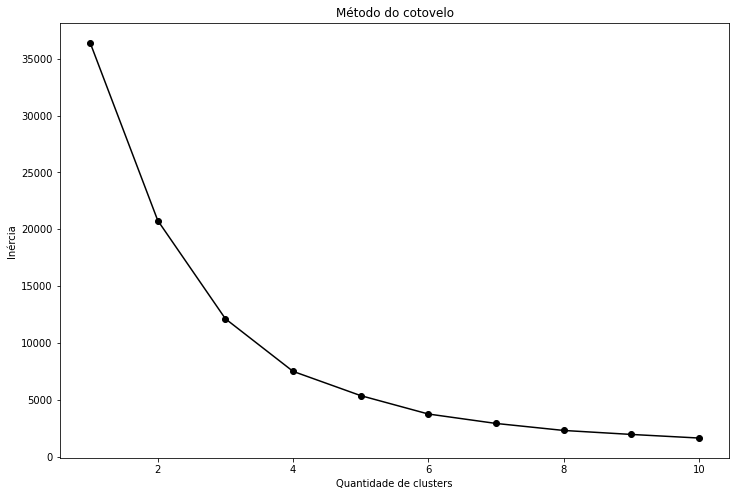

In [ ]:
# Escolher as colunas da base de dados que serão usadas no modelo.
Dados_Modelo = df4[["Overall","Value"]]

# Importar o método KMeans do Scikit-Learn.
from sklearn.cluster import KMeans    

# Declarar uma lista vazia para começar a armazer as somas dos erros médios de cada quantidade de clusters.
Inercia = []    

# Executar o K-Means para 10 quantidades, de 1 a 11.
for i in range(1,11): 

    kmeans = KMeans(n_clusters= i,         # Declarar o método do K-means com a quatidade de clusters referentes ao loop da vez.
                    init='k-means++',      # k-means++ é um método otimizado de iniciar os centroides para evitar mínimos e máximos locais.
                    random_state=101)      # Padronizar uma semente aleatória para cada loop apresentar resultados compatíveis.

    kmeans.fit(Dados_Modelo)               # Treinar o modelo.

    Inercia.append(kmeans.inertia_)        # Armazenar a Inercia (somatório dos erros médios quadráticos) para cada loop.

# Plotar gráfico do da quantidade de clusters pela Inércia.
plt.figure(figsize=(12,8))
plt.plot(range(1,11), Inercia, "ko-")
plt.title('Método do cotovelo')
plt.xlabel('Quantidade de clusters')
plt.ylabel('Inércia')
plt.show()

In [ ]:
# Declarar o modelo com 4 clusters, k-means++ e a mesma semente aleatória da método do cotovelo.
ModeloKMeansFinal = KMeans(n_clusters= 4, init='k-means++', random_state=101)

# Treinar o modelo e salvar os resultados dos grupos.
Resultado = ModeloKMeansFinal.fit_predict(Dados_Modelo)

# Adicionar resultados ao DataFrame nos dados originais.
BaseDeDados_Original["Cluster"] = ModeloKMeansFinal.labels_

#Mostrar DataFrame
BaseDeDados_Original

,Name,Wage,Overall,Value,Cluster
0,L. Messi,€565K,94,110500000.0,3
1,Cristiano Ronaldo,€405K,94,77000000.0,3
2,Neymar Jr,€290K,92,118500000.0,3
3,De Gea,€260K,91,72000000.0,3
4,K. De Bruyne,€355K,91,102000000.0,3
...,...,...,...,...,...
18202,J. Lundstram,€1K,47,60000.0,0
18203,N. Christoffersson,€1K,47,60000.0,0
18204,B. Worman,€1K,47,60000.0,0
18205,D. Walker-Rice,€1K,47,60000.0,0


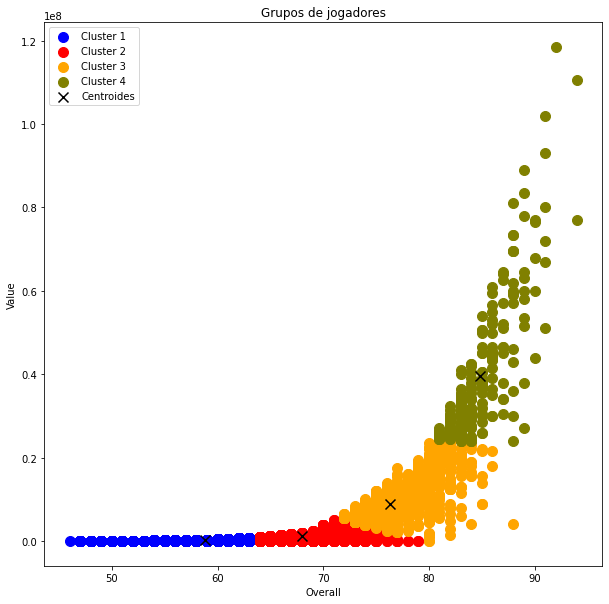

In [ ]:
# Plotar gráfico com os resultados

plt.figure(figsize=(10,10))
plt.scatter(BaseDeDados_Original["Overall"][BaseDeDados_Original["Cluster"]==0], BaseDeDados_Original["Value"][BaseDeDados_Original["Cluster"]==0], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(BaseDeDados_Original["Overall"][BaseDeDados_Original["Cluster"]==1], BaseDeDados_Original["Value"][BaseDeDados_Original["Cluster"]==1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(BaseDeDados_Original["Overall"][BaseDeDados_Original["Cluster"]==2], BaseDeDados_Original["Value"][BaseDeDados_Original["Cluster"]==2], s = 100, c = 'orange', label = 'Cluster 3')
plt.scatter(BaseDeDados_Original["Overall"][BaseDeDados_Original["Cluster"]==3], BaseDeDados_Original["Value"][BaseDeDados_Original["Cluster"]==3], s = 100, c = 'olive', label = 'Cluster 4')
plt.scatter(scaler.inverse_transform(ModeloKMeansFinal.cluster_centers_)[:, 0], scaler.inverse_transform(ModeloKMeansFinal.cluster_centers_)[:, 1], s = 100, c = 'black', label = 'Centroides', marker = "x")
plt.title('Grupos de jogadores')
plt.xlabel('Overall')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
BaseDeDados_Original.sort_values('Value',ascending=False) #Consultar os registros de jogadores com o seu valor e o cluster em que se encontra

,Name,Wage,Overall,Value,Cluster
2,Neymar Jr,€290K,92,118500000.0,3
0,L. Messi,€565K,94,110500000.0,3
4,K. De Bruyne,€355K,91,102000000.0,3
5,E. Hazard,€340K,91,93000000.0,3
15,P. Dybala,€205K,89,89000000.0,3
...,...,...,...,...,...
4298,J. Sambenito,€0,71,0.0,1
8605,S. Chhetri,€0,67,0.0,1
4274,M. Korhut,€0,71,0.0,1
4257,J. Riojas,€0,71,0.0,1


Criando um data frame para outras análises: Maior idade, distribuição das idades, distribuição das quantidades de jogadores por país e Top jogadores

In [ ]:
#Adicionando um data frame
df5 = pd.DataFrame(data)

In [ ]:
#Selecionar o jogador com maior idade
df5.nlargest(1, 'Age')

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
4741,4741,140029,O. Pérez,45,https://cdn.sofifa.org/players/4/19/140029.png,Mexico,https://cdn.sofifa.org/flags/83.png,71,71,Pachuca,https://cdn.sofifa.org/teams/2/light/110147.png,€160K,€8K,1256,Right,2.0,3.0,1.0,Medium/ Medium,Stocky,No,GK,21.0,"Jun 1, 1991",NaN,2021,5'8,165lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,19.0,14.0,24.0,26.0,13.0,12.0,12.0,20.0,27.0,23.0,60.0,57.0,69.0,72.0,69.0,24.0,85.0,41.0,66.0,18.0,26.0,12.0,12.0,40.0,23.0,62.0,23.0,12.0,11.0,70.0,64.0,65.0,73.0,74.0,€272K


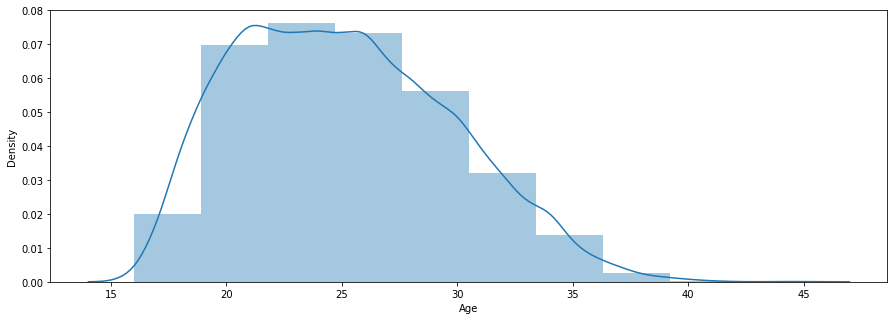

In [ ]:
#Distribuição das idades
graf = plt.subplots(figsize=(15,5))
ax = sns.distplot(df5['Age'],bins = 10)
plt.show()

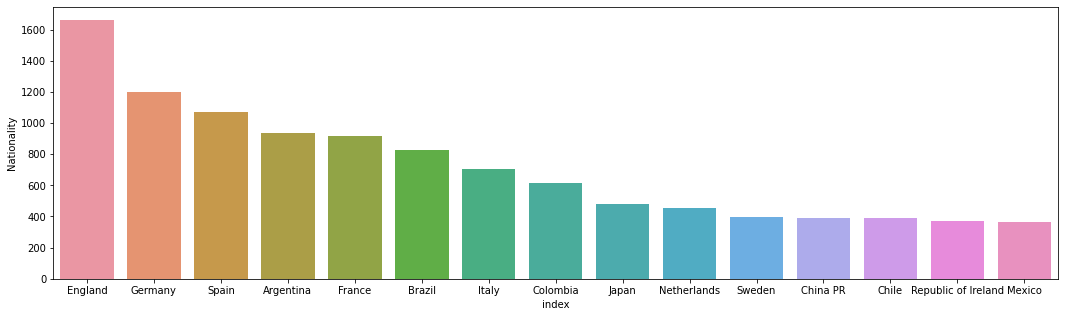

In [ ]:
#Criando gráfico por distribuição de quantidade por Nacionalidade
fig= plt.figure(figsize=(18,5))
jogadores_pais = df5['Nationality'].value_counts().reset_index()
jogadores_pais
sns.barplot(x="index", y="Nationality", data=jogadores_pais.head(15))

In [ ]:
#Selecionar os jogadores com maior Overall - Top 5
top_jogadores = df5.nlargest(5, 'Overall')
top_jogadores[['Name', 'Nationality', 'Overall', 'Club']]

,Name,Nationality,Overall,Club
0,L. Messi,Argentina,94,FC Barcelona
1,Cristiano Ronaldo,Portugal,94,Juventus
2,Neymar Jr,Brazil,92,Paris Saint-Germain
3,De Gea,Spain,91,Manchester United
4,K. De Bruyne,Belgium,91,Manchester City


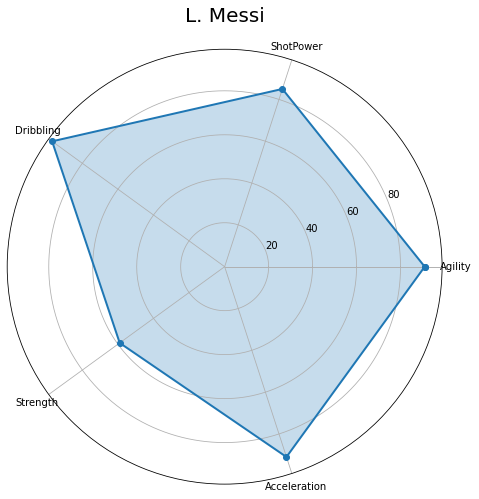

In [ ]:
#Dos tops jogadores, criando um gráfico de habilidades para o Maior
messi = top_jogadores.loc[[0]]

labels=np.array(['Agility', 'ShotPower', 'Dribbling', 'Strength', 'Acceleration'])
stats=messi.loc[0,labels].values

#Configurações
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))
#Tamanho plot
fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, polar=True)   # Set polar axis
ax.plot(angles, stats, 'o-', linewidth=2) 
ax.fill(angles, stats, alpha=0.25) 
ax.set_thetagrids(angles * 180/np.pi, labels) 
ax.set_title(messi.loc[0,"Name"], fontsize=20) 

ax.grid(True)